In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# take out first sheet from xlsx file
data = pd.read_excel('Crowdfunding campaign.xlsx', sheet_name=0)
data.drop('delivery', axis=1, inplace=True)
# drop the null values
data.dropna(inplace=True)

# data.dropna(subset=['cid'], inplace=True)
# drop duplicates based on cid
# data.drop_duplicates(subset=['cid'],inplace=True)

# drop the rows that are duplicates
data.drop_duplicates(inplace=True)
data

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,state,year_start,iot_plus
0,71762,0,2500,0.040000,0,1,0.0,Kentucky,2011,0.0
1,72367,0,1500,1.733333,0,0,0.0,Indiana,2012,0.0
2,73646,1,100000,1.007510,1,0,0.0,Louisiana,2012,0.0
3,74867,1,7000,0.000000,0,1,0.0,North Carolina,2012,0.0
4,82829,1,2000,1.000000,0,1,0.0,Pennsylvania,2011,0.0
...,...,...,...,...,...,...,...,...,...,...
219,248410,0,1500,1.088000,0,1,0.0,Illinois,2012,0.0
220,248622,0,10000,1.005000,0,1,0.0,New York,2012,0.0
221,250311,1,5000,1.007000,0,1,0.0,Kentucky,2012,0.0
222,256062,1,2000,8.188500,1,0,0.0,Georgia,2013,0.0


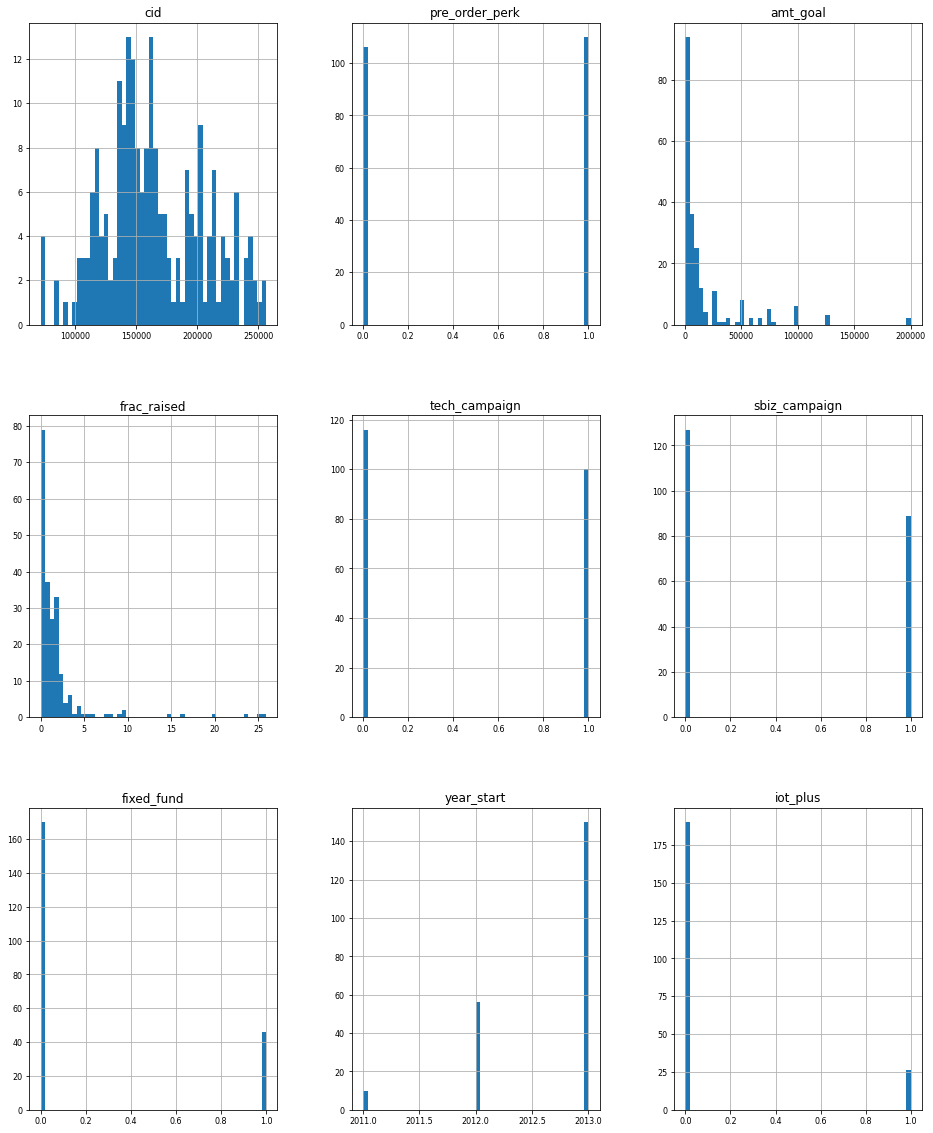

In [4]:
data.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)
plt.show()

In [5]:
data.describe()

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.00000
mean,164216.592593,0.509259,17533.518519,1.801634,0.462963,0.412037,0.212963,2012.648148,0.12037
std,41130.626378,0.501076,31481.563736,3.699447,0.499785,0.493345,0.410353,0.567570,0.32615
min,71762.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.00000
25%,137707.750000,0.000000,1462.500000,0.008788,0.000000,0.000000,0.000000,2012.000000,0.00000
50%,158916.000000,1.000000,5000.000000,1.019715,0.000000,0.000000,0.000000,2013.000000,0.00000
75%,194429.500000,1.000000,15000.000000,1.750967,1.000000,1.000000,0.000000,2013.000000,0.00000
max,256198.000000,1.000000,200000.000000,25.918080,1.000000,1.000000,1.000000,2013.000000,1.00000


In [116]:
# drop frac_raised if above 10
data['frac_raised'] = data['frac_raised'].apply(lambda x: x if x < 10 else 10)

In [95]:
data.describe()

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus,year,amt_goal_standardized,pre_order_perk_standardized,tech_campaign_std,sbiz_std,fixed_fund_std,iot_plus_std,year_std,frac_raised_rev
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.00000,216.000000,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,216.000000
mean,164216.592593,0.509259,17533.518519,1.263394,0.462963,0.412037,0.212963,2012.648148,0.12037,2.648148,-7.452886e-17,2.569961e-17,-4.780127e-16,-7.915479e-17,-3.803542e-17,-1.505997e-16,-1.198630e-15,3.494483
std,41130.626378,0.501076,31481.563736,1.384644,0.499785,0.493345,0.410353,0.567570,0.32615,0.567570,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.219256
min,71762.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.00000,1.000000,-5.423201e-01,-1.018693e+00,-9.284767e-01,-8.371305e-01,-5.201810e-01,-3.699218e-01,-2.910611e+00,2.648148
25%,137707.750000,0.000000,1462.500000,0.008788,0.000000,0.000000,0.000000,2012.000000,0.00000,2.000000,-5.116757e-01,-1.018693e+00,-9.284767e-01,-8.371305e-01,-5.201810e-01,-3.699218e-01,-1.144622e+00,2.653124
50%,158916.000000,1.000000,5000.000000,1.019715,0.000000,0.000000,0.000000,2013.000000,0.00000,3.000000,-3.990473e-01,9.816498e-01,-9.284767e-01,-8.371305e-01,-5.201810e-01,-3.699218e-01,6.213664e-01,3.225567
75%,194429.500000,1.000000,15000.000000,1.750967,1.000000,1.000000,0.000000,2013.000000,0.00000,3.000000,-8.066320e-02,9.816498e-01,1.077033e+00,1.194557e+00,-5.201810e-01,-3.699218e-01,6.213664e-01,3.639642
max,256198.000000,1.000000,200000.000000,5.000000,1.000000,1.000000,1.000000,2013.000000,1.00000,3.000000,5.809442e+00,9.816498e-01,1.077033e+00,1.194557e+00,1.922408e+00,2.703274e+00,6.213664e-01,8.310698


In [96]:
# standardise the year
data['year'] = data['year_start'].apply(lambda x: x-2010)
data

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,state,year_start,iot_plus,year,amt_goal_standardized,pre_order_perk_standardized,tech_campaign_std,sbiz_std,fixed_fund_std,iot_plus_std,year_std,frac_raised_rev
0,71762,0,2500,0.040000,0,1,0.0,Kentucky,2011,0.0,1,-0.478643,-1.018693,-0.928477,1.194557,-0.520181,-0.369922,-2.910611,2.670798
1,72367,0,1500,1.733333,0,0,0.0,Indiana,2012,0.0,2,-0.510482,-1.018693,-0.928477,-0.837130,-0.520181,-0.369922,-1.144622,3.629657
2,73646,1,100000,1.007510,1,0,0.0,Louisiana,2012,0.0,2,2.625602,0.981650,1.077033,-0.837130,-0.520181,-0.369922,-1.144622,3.218656
3,74867,1,7000,0.000000,0,1,0.0,North Carolina,2012,0.0,2,-0.335370,0.981650,-0.928477,1.194557,-0.520181,-0.369922,-1.144622,2.648148
4,82829,1,2000,1.000000,0,1,0.0,Pennsylvania,2011,0.0,1,-0.494563,0.981650,-0.928477,1.194557,-0.520181,-0.369922,-2.910611,3.214403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,248410,0,1500,1.088000,0,1,0.0,Illinois,2012,0.0,2,-0.510482,-1.018693,-0.928477,1.194557,-0.520181,-0.369922,-1.144622,3.264234
220,248622,0,10000,1.005000,0,1,0.0,New York,2012,0.0,2,-0.239855,-1.018693,-0.928477,1.194557,-0.520181,-0.369922,-1.144622,3.217234
221,250311,1,5000,1.007000,0,1,0.0,Kentucky,2012,0.0,2,-0.399047,0.981650,-0.928477,1.194557,-0.520181,-0.369922,-1.144622,3.218367
222,256062,1,2000,5.000000,1,0,0.0,Georgia,2013,0.0,3,-0.494563,0.981650,1.077033,-0.837130,-0.520181,-0.369922,0.621366,7.284927


In [97]:
from sklearn.preprocessing import StandardScaler

# standardize the data
scaler = StandardScaler()
data['amt_goal_standardized'] = scaler.fit_transform(data['amt_goal'].values.reshape(-1,1))
data['pre_order_perk_standardized'] = scaler.fit_transform(data['pre_order_perk'].values.reshape(-1,1))
data['tech_campaign_std'] = scaler.fit_transform(data['tech_campaign'].values.reshape(-1,1))
data['sbiz_std'] = scaler.fit_transform(data['sbiz_campaign'].values.reshape(-1,1))
data['fixed_fund_std'] = scaler.fit_transform(data['fixed_fund'].values.reshape(-1,1))
data['iot_plus_std'] = scaler.fit_transform(data['iot_plus'].values.reshape(-1,1))
data['year_std'] = scaler.fit_transform(data['year'].values.reshape(-1,1))
data['frac_raised_rev'] = scaler.inverse_transform(data['frac_raised'].values.reshape(-1,1))
data

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,state,year_start,iot_plus,year,amt_goal_standardized,pre_order_perk_standardized,tech_campaign_std,sbiz_std,fixed_fund_std,iot_plus_std,year_std,frac_raised_rev
0,71762,0,2500,0.040000,0,1,0.0,Kentucky,2011,0.0,1,-0.478643,-1.018693,-0.928477,1.194557,-0.520181,-0.369922,-2.910611,2.670798
1,72367,0,1500,1.733333,0,0,0.0,Indiana,2012,0.0,2,-0.510482,-1.018693,-0.928477,-0.837130,-0.520181,-0.369922,-1.144622,3.629657
2,73646,1,100000,1.007510,1,0,0.0,Louisiana,2012,0.0,2,2.625602,0.981650,1.077033,-0.837130,-0.520181,-0.369922,-1.144622,3.218656
3,74867,1,7000,0.000000,0,1,0.0,North Carolina,2012,0.0,2,-0.335370,0.981650,-0.928477,1.194557,-0.520181,-0.369922,-1.144622,2.648148
4,82829,1,2000,1.000000,0,1,0.0,Pennsylvania,2011,0.0,1,-0.494563,0.981650,-0.928477,1.194557,-0.520181,-0.369922,-2.910611,3.214403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,248410,0,1500,1.088000,0,1,0.0,Illinois,2012,0.0,2,-0.510482,-1.018693,-0.928477,1.194557,-0.520181,-0.369922,-1.144622,3.264234
220,248622,0,10000,1.005000,0,1,0.0,New York,2012,0.0,2,-0.239855,-1.018693,-0.928477,1.194557,-0.520181,-0.369922,-1.144622,3.217234
221,250311,1,5000,1.007000,0,1,0.0,Kentucky,2012,0.0,2,-0.399047,0.981650,-0.928477,1.194557,-0.520181,-0.369922,-1.144622,3.218367
222,256062,1,2000,5.000000,1,0,0.0,Georgia,2013,0.0,3,-0.494563,0.981650,1.077033,-0.837130,-0.520181,-0.369922,0.621366,5.479423


<AxesSubplot: >

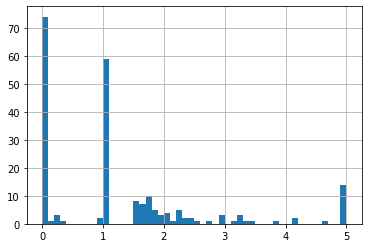

In [98]:
data['frac_raised'].hist(bins=50)

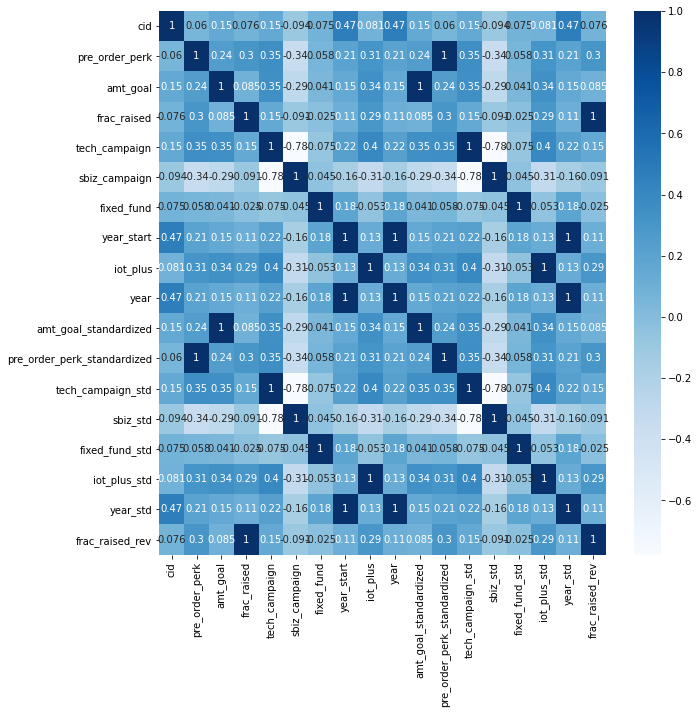

In [99]:
sns.heatmap(data.corr(),annot=True, cmap='Blues')
plt.gcf().set_size_inches(10, 10)

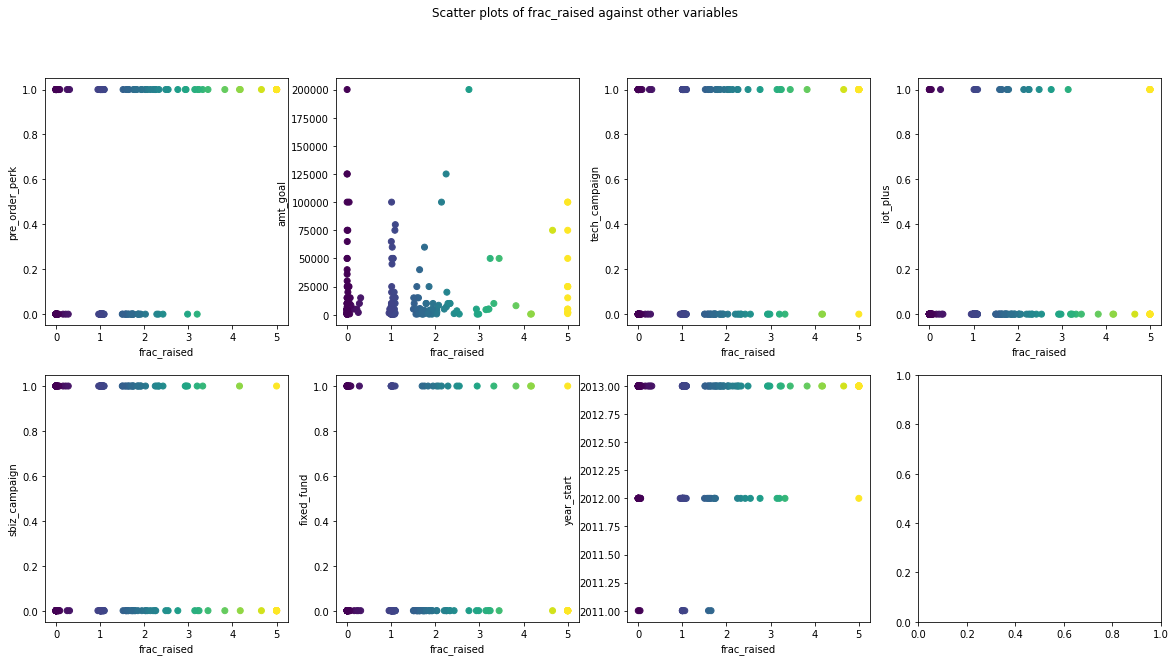

In [100]:
# add multiple plots in one figure
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax[0, 0].scatter(data["frac_raised"], data["pre_order_perk"], c=data["frac_raised"])
ax[0, 0].set_xlabel("frac_raised")
ax[0, 0].set_ylabel("pre_order_perk")
ax[0, 1].scatter(data["frac_raised"], data["amt_goal"], c=data["frac_raised"])
ax[0, 1].set_xlabel("frac_raised")
ax[0, 1].set_ylabel("amt_goal")
ax[0, 2].scatter(data["frac_raised"], data["tech_campaign"], c=data["frac_raised"])
ax[0, 2].set_xlabel("frac_raised")
ax[0, 2].set_ylabel("tech_campaign")
ax[1, 0].scatter(data["frac_raised"], data["sbiz_campaign"], c=data["frac_raised"])
ax[1, 0].set_xlabel("frac_raised")
ax[1, 0].set_ylabel("sbiz_campaign")
ax[1, 1].scatter(data["frac_raised"], data["fixed_fund"], c=data["frac_raised"])
ax[1, 1].set_xlabel("frac_raised")
ax[1, 1].set_ylabel("fixed_fund")
ax[1, 2].scatter(data["frac_raised"], data["year_start"], c=data["frac_raised"])
ax[1, 2].set_xlabel("frac_raised")
ax[1, 2].set_ylabel("year_start")
ax[0, 3].scatter(data["frac_raised"], data["iot_plus"], c=data["frac_raised"])
ax[0, 3].set_xlabel("frac_raised")
ax[0, 3].set_ylabel("iot_plus")
# add a title to the figure
fig.suptitle("Scatter plots of frac_raised against other variables")
plt.show()

In [117]:
target = data['frac_raised_rev']

# maybe remove state? because it is a categorical variable
predictor = data.drop(columns=['frac_raised','frac_raised_rev', 'cid', 'state', 'year_start', 'amt_goal'])
# predictor = data[['amt_goal_standardized',	'pre_order_perk_standardized',	'tech_campaign_std',	'sbiz_std',	'fixed_fund_std',	'iot_plus_std',	'year_std']]
# predictor = data.iloc[:,data.columns!='frac_raised']

In [102]:
predictor

,amt_goal_standardized,pre_order_perk_standardized,tech_campaign_std,sbiz_std,fixed_fund_std,iot_plus_std,year_std
0,-0.478643,-1.018693,-0.928477,1.194557,-0.520181,-0.369922,-2.910611
1,-0.510482,-1.018693,-0.928477,-0.837130,-0.520181,-0.369922,-1.144622
2,2.625602,0.981650,1.077033,-0.837130,-0.520181,-0.369922,-1.144622
3,-0.335370,0.981650,-0.928477,1.194557,-0.520181,-0.369922,-1.144622
4,-0.494563,0.981650,-0.928477,1.194557,-0.520181,-0.369922,-2.910611
...,...,...,...,...,...,...,...
219,-0.510482,-1.018693,-0.928477,1.194557,-0.520181,-0.369922,-1.144622
220,-0.239855,-1.018693,-0.928477,1.194557,-0.520181,-0.369922,-1.144622
221,-0.399047,0.981650,-0.928477,1.194557,-0.520181,-0.369922,-1.144622
222,-0.494563,0.981650,1.077033,-0.837130,-0.520181,-0.369922,0.621366


In [103]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=0)

In [119]:
# Fit a logistic regression model on the training set
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = linreg.predict(X_test)

# RMSE
print(f'RMSE is {mean_squared_error(y_test, y_pred, squared = False)}')

RMSE is 0.7184385941761195


In [120]:
# ols
import statsmodels.api as sm

x1 = sm.add_constant(X_train)

ols = sm.OLS(y_train, x1).fit()
summary = ols.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:        frac_raised_rev   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     3.824
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           0.000772
Time:                        17:13:05   Log-Likelihood:                -167.57
No. Observations:                 151   AIC:                             351.1
Df Residuals:                     143   BIC:                             375.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

ValueError: label must be scalar or have the same length as the input data, but found 7 for 13 datasets.

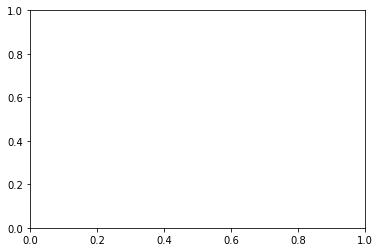

In [121]:
# fit lasso regression on model
from sklearn.linear_model import Lasso

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs, label=['pre_order_perk', 'amt_goal', 'tech_campaign', 'sbiz_campaign', 'fixed_fund', 'iot_plus', 'year'])
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.legend(loc='lower right')
plt.title('Lasso coefficients as a function of alpha')

ValueError: label must be scalar or have the same length as the input data, but found 8 for 7 datasets.

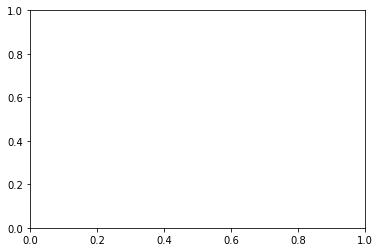

In [108]:
# fit lasso regression on model
from sklearn.linear_model import Ridge

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
ridge = Ridge(max_iter=10000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs, label=['pre_order_perk', 'amt_goal', 'tech_campaign', 'sbiz_campaign', 'fixed_fund', 'iot_plus', 'year', 'amt_goal_standardized'])
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.legend(loc='upper right')
plt.title('Ridge coefficients as a function of alpha')

In [122]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV
param_grid_new = {
    'n_jobs':[100,150],
}

lr = LinearRegression()
grid_search_rf = GridSearchCV(estimator = lr, param_grid = param_grid_new, cv=3, verbose=1)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


{'n_jobs': 100}

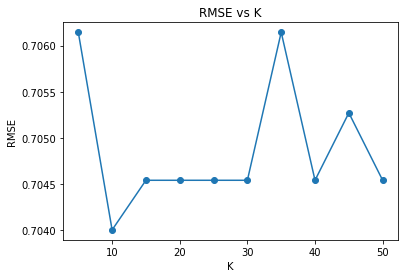

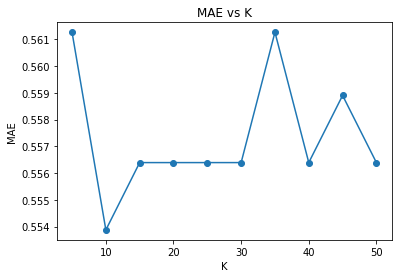

In [123]:
# Create a list of alphas to cross-validate over
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 4, 100)

# Create a ridge regressor
ridge = Ridge()
ridge_mse_list = []
ridge_mae_list = []
ridge_r2_list = []
ridge_oos_acc_list = []

K = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for k in K:
    # Use RidgeCV to perform 10-fold cross-validation
    ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=k)

    # Fit the regressor to the data
    ridge_cv.fit(X_train, y_train)

    # Compute and print the coefficients
    ridge_coefficients = ridge_cv.coef_
    # print(f'the coefficients are: {ridge_coefficients}')

    # Compute and print the test error
    ridge_mse = mean_squared_error(y_test, ridge_cv.predict(X_test), squared=False)
    ridge_mse_list.append(ridge_mse)
    # print(f'the ridge rmse is: {ridge_mse}')
    
    # compute and print the r2 score
    ridge_r2 = r2_score(y_test, ridge_cv.predict(X_test))
    ridge_r2_list.append(ridge_r2)
    # print(f'the ridge r2 is: {ridge_r2}')
    
    # compute and print out-of-sample predictive accuracy
    # ridge_oos_acc = ridge_cv.score(X_test, y_test)
    # ridge_oos_acc_list.append(ridge_oos_acc)
    # print(f'the out-of-sample predictive accuracy is: {ridge_oos_acc}')
    
    # compute and print the mae
    ridge_mae = mean_absolute_error(y_test, ridge_cv.predict(X_test))
    ridge_mae_list.append(ridge_mae)
    # print(f'the ridge mae is: {ridge_mae}')

    # Compute and print the alpha value
    ridge_alpha = ridge_cv.alpha_
    # print(f'the alpha is: {ridge_alpha}')
    
import matplotlib.pyplot as plt
plt.plot(K, ridge_mse_list, marker = 'o')
plt.title('RMSE vs K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

plt.plot(K, ridge_mae_list, marker = 'o')
plt.title('MAE vs K')
plt.xlabel('K')
plt.ylabel('MAE')
plt.show()

In [ ]:
len(data)

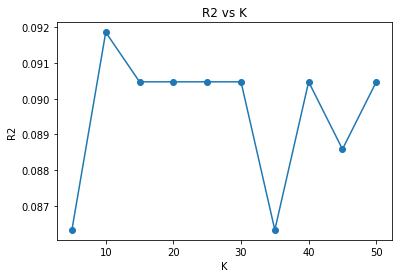

In [124]:
plt.plot(K, ridge_r2_list, marker = 'o')
plt.title('R2 vs K')
plt.xlabel('K')
plt.ylabel('R2')
plt.show()


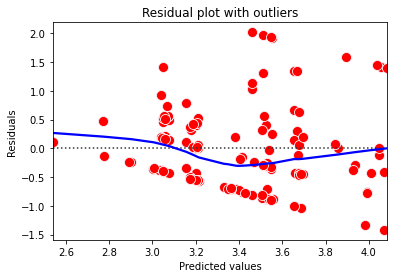

In [115]:
import seaborn as sns

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate residuals
y_pred = model.predict(X_train)
residuals = y_train - y_pred

# Create a residual plot with outliers highlighted
sns.residplot(x=y_pred, y=residuals, scatter_kws={'s': 80}, color='b', lowess=True)
sns.scatterplot(x=y_pred, y=residuals, marker='o', s=100, color='r')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot with outliers")
plt.show()


In [ ]:
# random forest regression model with bootstrap and gradient boosting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.2, random_state=42)

# Random Forest Regression model with bootstrap
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, bootstrap=True)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f'the random forest mse is: {rf_mse}')

# Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42, learning_rate=0.1)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f'the gradient boosting mse is: {gb_mse}')

# Gradient Boosting Regression model
gb_model = AdaBoostRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f'the gradient boosting mse is: {gb_mse}')

# Gradient Boosting Regression model
gb_model = BaggingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f'the gradient boosting mse is: {gb_mse}')


the random forest mse is: 7.139533509490098
the gradient boosting mse is: 5.240628071904603
the gradient boosting mse is: 4.3704652718051165
the gradient boosting mse is: 7.165409353735822


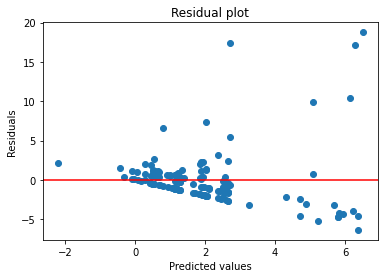

In [ ]:
import matplotlib.pyplot as plt

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate residuals
y_pred = model.predict(X_train)
residuals = y_train - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()


In [ ]:
# lowest index 
ridge_mse_list.index(min(ridge_mse_list))
# don't think mae makes sense here?

16

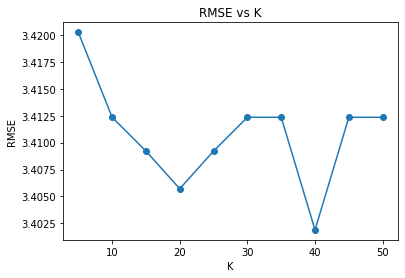

In [ ]:
# Create a list of alphas to cross-validate over
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 4, 100)

# Create a ridge regressor
lasso = Lasso()
lasso_mse_list = []
K = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for k in K:
    # Use RidgeCV to perform 10-fold cross-validation
    lasso_cv = LassoCV(alphas=alphas, cv=k)

    # Fit the regressor to the data
    lasso_cv.fit(X_train, y_train)

    # Compute and print the test error
    lasso_mse = mean_squared_error(y_test, lasso_cv.predict(X_test), squared=False)
    lasso_mse_list.append(lasso_mse)    
    
import matplotlib.pyplot as plt
plt.plot(K, lasso_mse_list, marker = 'o')
plt.title('RMSE vs K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()